In [40]:
#import important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [41]:
#read dataset csv file.
df = pd.read_csv('weatherHistory.csv')

In [42]:
# find the features and observation in the data set.
df.shape

(96453, 12)

In [43]:
train = df[:int(df.shape[0]*.70)]
test = df[(int(df.shape[0]*.70)) + 1:]

In [44]:
df.columns
df = df.drop(['Formatted Date', 'Summary', 'Precip Type',
       'Apparent Temperature (C)', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'], axis=1)

In [45]:
# find the datatypes of the features and target variable. 
df.dtypes

Temperature (C)    float64
Humidity           float64
dtype: object

In [46]:
df.head()
#Here our feature varibale is Humidity and target variable is Temperature (C)

,Temperature (C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


In [47]:
#rename the Temperature column with Temp.
df.rename(columns= {"Temperature (C)": "Temp"}, inplace=True)

In [48]:
df.head()

,Temp,Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


In [49]:
df.describe()

,Temp,Humidity
count,96453.000000,96453.000000
mean,11.932678,0.734899
std,9.551546,0.195473
min,-21.822222,0.000000
25%,4.688889,0.600000
50%,12.000000,0.780000
75%,18.838889,0.890000
max,39.905556,1.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
Temp        96453 non-null float64
Humidity    96453 non-null float64
dtypes: float64(2)
memory usage: 1.5 MB


In [51]:
# Replace the nan values with median of column 'Temp'
df['Temp'] = df['Temp'].replace(0, np.NaN)

In [52]:
# Check the null values in the dataset
df.isnull().any()

Temp         True
Humidity    False
dtype: bool

In [53]:
# Check the nan values in the dataset
df.isna().sum()

Temp        325
Humidity      0
dtype: int64

In [54]:
df['Temp'] = (df['Temp'] * 9/5) + 32

In [55]:
df.head()

,Temp,Humidity
0,49.05,0.89
1,48.84,0.86
2,48.88,0.89
3,46.92,0.83
4,47.76,0.83


In [56]:
df.describe()

,Temp,Humidity
count,96128.000000,96453.000000
mean,53.551439,0.734899
std,17.176325,0.195473
min,-7.280000,0.000000
25%,40.670000,0.600000
50%,53.680000,0.780000
75%,65.920000,0.890000
max,103.830000,1.000000


In [57]:
# Replace the nan values with median of column 'Temp'
df['Temp'] = df['Temp'].replace(0, np.NaN)

In [58]:
# Check the nan values in the dataset
df.isna().sum()

Temp        325
Humidity      0
dtype: int64

In [59]:
# Replace the nan values with median of column 'Temp'
df['Humidity'] = df['Humidity'].replace(0, np.NaN)

In [60]:
# Check the null values in the dataset
df.isnull().any()

Temp        True
Humidity    True
dtype: bool

In [61]:
# Check the nan values in the dataset
df.isna().sum()

Temp        325
Humidity     22
dtype: int64

In [62]:
df['Humidity'] = df['Humidity'].replace(np.NaN, df['Humidity'].median())
df['Temp'] = df['Temp'].replace(np.NaN, df['Temp'].median())

In [63]:
# df['Temp'].replace(0, np.nan, inplace= True)
df.isna().sum()

Temp        0
Humidity    0
dtype: int64

In [64]:
# Sum the duplicated values in the dataset
df.duplicated().sum()

37383

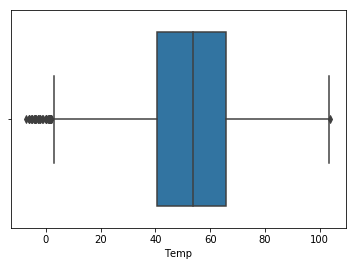

In [65]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['Temp'])

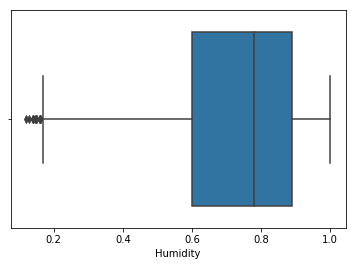

In [66]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['Humidity'])

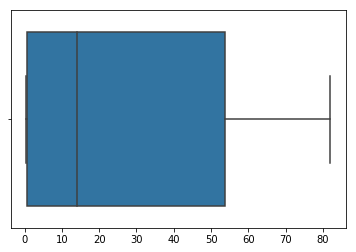

In [67]:
# Remove the outlier from the whole dataset
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

df= remove_outlier(df)
sns.boxplot(df)

(array([ 2851.,  3386.,  4325.,  5095.,  6018.,  7183.,  9241., 10961.,
        12787., 17224.]),
 array([0.36, 0.42, 0.48, 0.54, 0.6 , 0.66, 0.72, 0.78, 0.84, 0.9 , 0.96]),
 <a list of 10 Patch objects>)

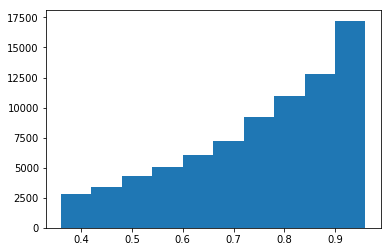

In [68]:
# Histrogram of the feature varibale
plt.hist(df['Humidity'])

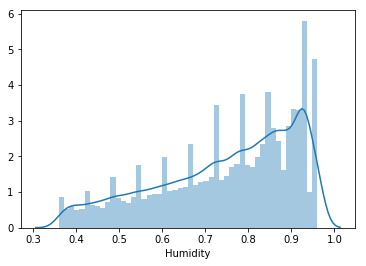

In [69]:
# Distplot of the feature varibale
sns.distplot(df['Humidity'])

In [70]:
# Mean and median of the Humidity column 
print("Mean is", df['Humidity'].mean(), df['Humidity'].skew(), ", Median is ", df['Humidity'].median())

Mean is 0.7488753145906643 -0.6357293490775081 , Median is  0.78


Skewness is -0.3134551464766196
0.586594842609914 0.6084


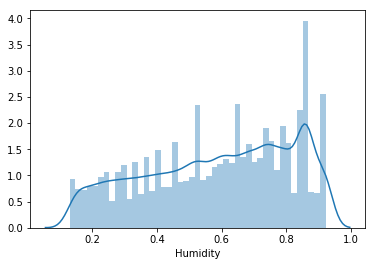

In [71]:
# now transforming feature variable
target = (np.square((df['Humidity'])))
print ('Skewness is', target.skew())
sns.distplot(target)
print(target.mean(), target.median())
df['Humidity'] = target

(array([ 5494.,  7976.,  8706., 10005.,  9714.,  9802.,  9335.,  7995.,
         5862.,  4182.]),
 array([27.03 , 32.526, 38.022, 43.518, 49.014, 54.51 , 60.006, 65.502,
        70.998, 76.494, 81.99 ]),
 <a list of 10 Patch objects>)

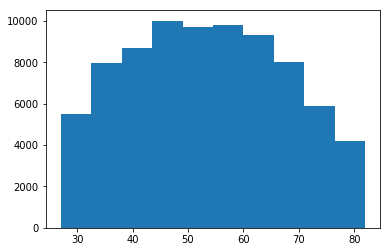

In [72]:
# Histrogram of the target varibale
plt.hist(df['Temp'])

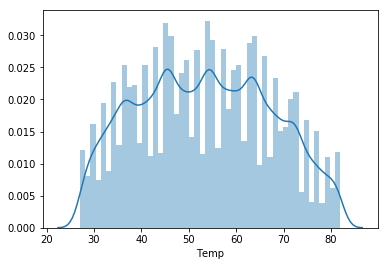

In [73]:
# Distplot of the feature varibale
sns.distplot(df['Temp'])

In [74]:
print("Mean is", df['Temp'].mean(), ", Median is ", df['Temp'].median(), df['Temp'].skew())

Mean is 53.389349066030064 , Median is  53.68 0.06831104868383268


Skewness is -0.2152076074223163
3.7357535061510467 3.772282154077493


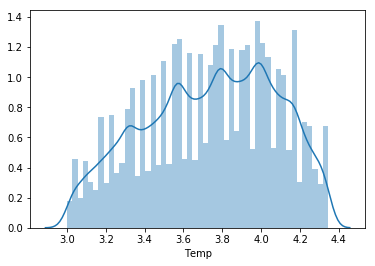

In [75]:
# now transforming feature variable
target = (np.cbrt((df['Temp'])))
print ('Skewness is', target.skew())
sns.distplot(target)
print(target.mean(), target.median())
# df['Temp'] = target

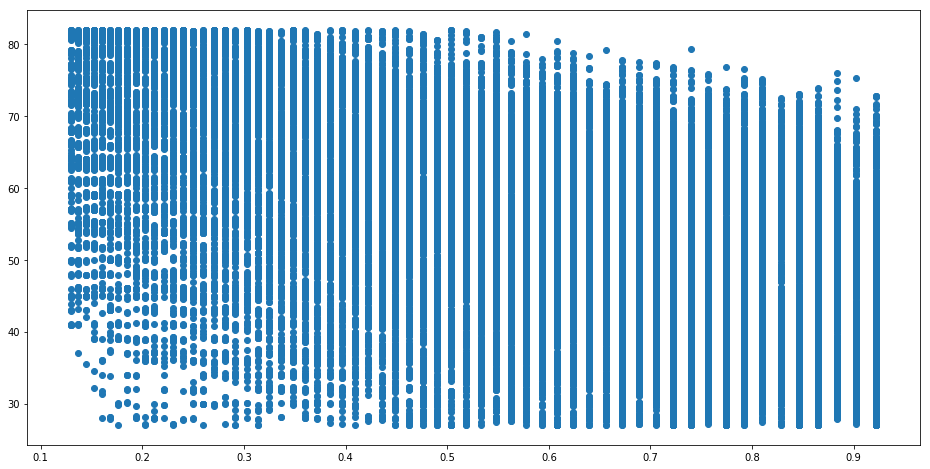

In [76]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Humidity'], df['Temp'])
plt.show()

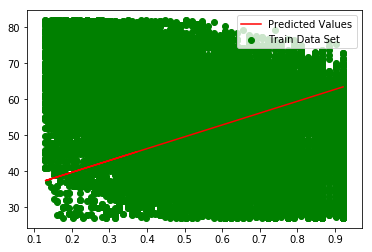

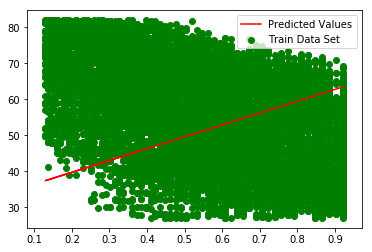

Train data accuracy  67.71908869155084
Test data accuracy  68.76868958479444
R2 score of train dataset  -83.96001886154147
R2 score of test dataset  -86.40612599572606


In [77]:
#Using Python Code
class LinearTrainer:

    def __init__(self):

        # Learning Rate
        self.l_rate = 0.001
        # Total iterations
        self.iterations = 6000

    def trains(self, x_data_train, y_data_train):

        i = 0
        parameters = np.array([0, 1], dtype='f')

        # length of the train and test data sets.
        x_data_train = np.column_stack((np.ones((x_data_train.shape[0], 1)), x_data_train))

        while i <= self.iterations:
            temp1 = ((np.dot(x_data_train, parameters)) - y_data_train)
            temp2 = np.dot(temp1, x_data_train)
            parameters[0] = parameters[0] - ((self.l_rate * np.sum(temp1)) / len(x_data_train))
            parameters[1] = parameters[1] - ((self.l_rate * np.sum(temp2)) / len(x_data_train))
            i += 1

        return parameters

    def classify(self, x_data_test, parameters):

        x_data_test = np.column_stack((np.ones((x_data_test.shape[0], 1)), x_data_test))
        return np.dot(x_data_test, parameters)

    def accuracy(self, y_data_test, y_pred_test):

        total_error = 0
        for i in range(0, len(y_data_test)):
            total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i])
        total_error = (total_error / len(y_data_test))
        accuracy = 1 - total_error
        return accuracy * 100
    def plotgraph(self, x_data_test, y_data_test, y_pred, x_data_train, y_data_train):

        plt.scatter(x_data_train, y_data_train, color='g', label='Train Data Set')
        plt.plot(x_data_test, y_pred, color='r', label='Predicted Values')
        plt.legend()
        plt.show()
        plt.scatter(x_data_test, y_data_test, color='g', label='Train Data Set')
        plt.plot(x_data_test, y_pred, color='r', label='Predicted Values')
        plt.legend()
        plt.show()


def main():

    x_data_set = np.array(pd.DataFrame(df, columns=['Humidity'])['Humidity'])
    
    y_data_set = np.array(pd.DataFrame(df, columns=['Temp'])['Temp'])
    x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
        x_data_set, y_data_set, test_size=0.25, shuffle=False)

    l_t = LinearTrainer()
    parameters = l_t.trains(x_data_train, y_data_train)
    y_prediction = l_t.classify(x_data_test, parameters)
    y_prediction_train = l_t.classify(x_data_train, parameters)
    accuracy = l_t.accuracy(y_data_test, y_prediction)
    accuracy_train = l_t.accuracy(y_data_train, y_prediction_train)
    
    l_t.plotgraph(x_data_test, y_data_test, y_prediction, x_data_train, y_data_train)    
    print("Train data accuracy ", accuracy_train)
    print("Test data accuracy ", accuracy)    
    print("R2 score of train dataset ", (r2_score(y_data_train, y_prediction_train))  * 100)
    print("R2 score of test dataset ",(r2_score(y_data_test, y_prediction))  * 100)

if __name__ == '__main__':
    main()


In [78]:
# Using sklearn linear regression model
from sklearn.linear_model import LinearRegression
x_data_set = np.array(pd.DataFrame(df, columns=['Humidity'])['Humidity'])
y_data_set = np.array(pd.DataFrame(df, columns=['Temp'])['Temp'])

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
        x_data_set, y_data_set, test_size=0.25, shuffle=False)

model = LinearRegression()
x_data_train = x_data_train.reshape(len(x_data_train), 1)
y_data_train = y_data_train.reshape(len(y_data_train), 1)
x_data_test = x_data_test.reshape(len(x_data_test), 1)
y_data_test = y_data_test.reshape(len(y_data_test), 1)

reg = model.fit(x_data_train,y_data_train)
reg.score(x_data_test, y_data_test)
y_pred =  reg.predict(x_data_test)
accuracy = 1 - mean_absolute_error(y_data_test,y_pred)
accuracy

-8.938947141779975